# Multiple Linear Regression Regression Implementation


## 1. Considerations
*__Multiple linear regression__ refers to a statistical technique that uses two or more independent variables to predict the outcome of a dependent variable. The technique enables analysts to determine the variation of the model and the relative contribution of each independent variable in the total variance. Multiple regression can take two forms, i.e., linear regression and non-linear regression.*<br>

*Polynomial Regression is a special case of Linear Regression where we fit the polynomial equation on the data with a curvilinear relationship between the dependent and independent variables.*

$$
    y_i = b_0 + b_1x_1 + b_2x_2 + ... + b_i x_i + error
$$

__Advantages of Polynomial Regression__
- The most important advantage of Multivariate regression is it helps us to understand the relationships among variables present in the dataset. This will further help in understanding the correlation between dependent and independent variables. Multivariate linear regression is a widely used machine learning algorithm.

__Disadvantage of Polynomial Regression__
- Multivariate techniques are a bit complex and require a high-levels of mathematical calculation. 
- The multivariate regression model’s output is not easy to interpret sometimes, because it has some loss and error output which are not identical.
- This model does not have much scope for smaller datasets. Hence, the same cannot be applied to them. The results are better for larger datasets.


#### 1.2 Choses mathématiques
$$
b \: = \: coefs
$$
$$
x = parameters
$$
$$
\begin{bmatrix}
y_1\\
y_2\\
y_3\\
y_4\\
y_5\\
... \\
y_n \\
\end{bmatrix}
=
\begin{bmatrix}
x_{11} & x_{12} & ... & x_{1m} \\
x_{21} & x_{22} & ... & x_{2m} \\
x_{31} & x_{32} & ... & x_{3m} \\
x_{41} & x_{42} & ... & x_{4m} \\
x_{51} & x_{52} & ... & x_{5m} \\
... & ... & ... & ...\\
x_{n1} & x_{n2} & ... & x_{nm} \\
\end{bmatrix}
\begin{bmatrix}
b_1 \\
b_2 \\
b_3 \\
b_4 \\
b_5 \\
... \\
b_n \\
\end{bmatrix}
+
\begin{bmatrix}
error_1 \\
error_2 \\
error_3 \\
error_4 \\
error_5 \\
... \\
error_n \\
\end{bmatrix}
$$
$$ERR = Y - Xb \rightarrow ERR^T ERR = (Y-Xb)^T(Y-Xb)$$
$$ERR^T ERR = (Y-Xb)^T(Y-Xb)$$
$$ERR^T ERR = (Y^T-b^TX^T)(Y-Xb)$$
$$ERR^T ERR = Y^Y - Y^TXb - b^TX^TY + b^TX^TXb$$
$$ERR^T ERR = Y^Y - 2Y^TXb + b^TX^TXb$$
$$note \: that \: b^TX^TY = (b^TX^TY)^T = Y^TXb $$
$$\frac{\partial (ERR^T ERR)}{\partial b} = \frac{\partial (Y^Y - 2Y^TXb + b^TX^TXb)}{\partial b}$$
$$0 = -2X^TY + 2X^TXB$$
$$B = (X^TX)^{-1}X^TY$$
#### 1.3 NumPy Implementation 

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
data = pd.read_csv("./data/kc_house_data.csv")
data.insert(loc=0, column='A', value=1)
Y = data["price"].to_numpy()
X = data[["A", "bedrooms", "bathrooms", "yr_built"]].to_numpy()

In [60]:
n = Y.shape[0]
m = X.shape[1]

In [65]:
print(Y.shape)
print(X.shape)

(21613,)
(21613, 4)


In [68]:
np.dot(X.T,X)

array([[2.16130000e+04, 7.28540000e+04, 4.57062500e+04, 4.25993340e+07],
       [7.28540000e+04, 2.64274000e+05, 1.62054750e+05, 1.43686638e+08],
       [4.57062500e+04, 1.62054750e+05, 1.09476812e+05, 9.03346532e+07],
       [4.25993340e+07, 1.43686638e+08, 9.03346532e+07, 8.39821529e+10]])

$$
\begin{bmatrix}
b_1 \\
b_2 \\
b_3 \\
b_4 \\
b_5 \\
... \\
b_n \\
\end{bmatrix}
=
\begin{bmatrix}
x_{11} & x_{12} & ... & x_{1m} \\
x_{21} & x_{22} & ... & x_{2m} \\
x_{31} & x_{32} & ... & x_{3m} \\
x_{41} & x_{42} & ... & x_{4m} \\
x_{51} & x_{52} & ... & x_{5m} \\
... & ... & ... & ...\\
x_{n1} & x_{n2} & ... & x_{nm} \\
\end{bmatrix}^{-1}
\begin{bmatrix}
y_1\\
y_2\\
y_3\\
y_4\\
y_5\\
... \\
y_n \\
\end{bmatrix}
$$

In [86]:
def multilinear_regression(x,y):
    # coeficents = Y * inverse(A)
    n = x.shape[0]
    
    _Y = np.array([
        [(np.power(x,2)*y).sum()], 
        [(x*y).sum()], 
        [y.sum()]
    ])

    _A = np.array([
        [np.power(x,4).sum(), np.power(x,3).sum(), np.power(x,2).sum()], 
        [np.power(x,3).sum(), np.power(x,2).sum(), x.sum()], 
        [np.power(x,2).sum(), x.sum(), n]])

    _coef = np.dot(np.linalg.inv(_A),_Y).reshape(-1)

    
    return (_coef[0], _coef[1], _coef[2])

def polynomial_regression_predict(x, a, b, c):
    predicted = a*(x**2) + b*x + c
    return predicted

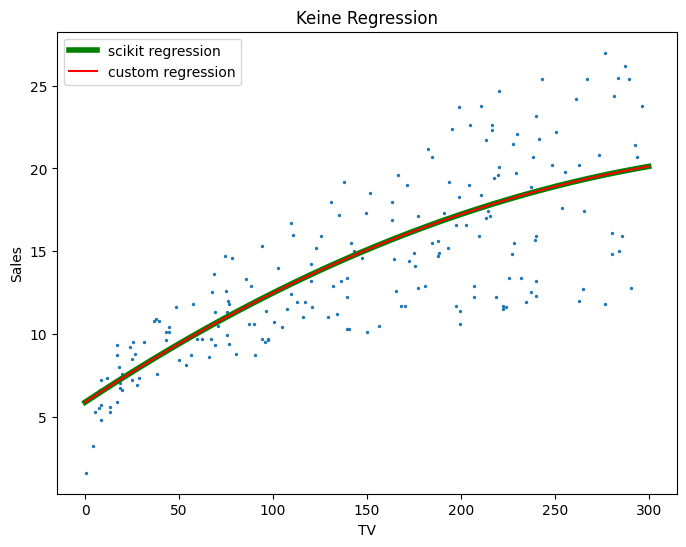

In [102]:
x_train = x[:int(len(x)*0.8)]
x_test = x[int(len(x)*0.8):]
y_train = y[:int(len(x)*0.8)]
y_test = y[int(len(x)*0.8):]

# Calculate slope and intercept using custom regression
a, b, c = polynomial_regression(x_train,y_train)

# Create a PolynomialFeatures object to transform the features
poly_features = PolynomialFeatures(degree=2)  # 2nd-degree polynomial
# Transform the original features into polynomial features
x_train_poly = poly_features.fit_transform(x_train.reshape(-1, 1))
# Create and fit a linear regression model
model = LinearRegression()
model.fit(x_train_poly, y_train)

# Adjust the figure size
plt.figure(figsize=(8, 6))  # Width x Height in inches

# Create a line plot
plt.scatter(x, y, s=2)

# Generate 200 points from 0 to 60
_x = np.linspace(0, 300, 1000)  
_x_poly = poly_features.transform(_x.reshape(-1, 1))
sklearn_y_predicted = model.predict(_x_poly)

# Plot sklearn regression
plt.plot(_x, sklearn_y_predicted, color='green', label='scikit regression', linewidth = 4)
# Plot custom regression
plt.plot(_x, polynomial_regression_predict(_x, a, b, c), color='red', label='custom regression')

# Add labels and a title
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Keine Regression')
plt.legend()
# Show the plot
plt.show()

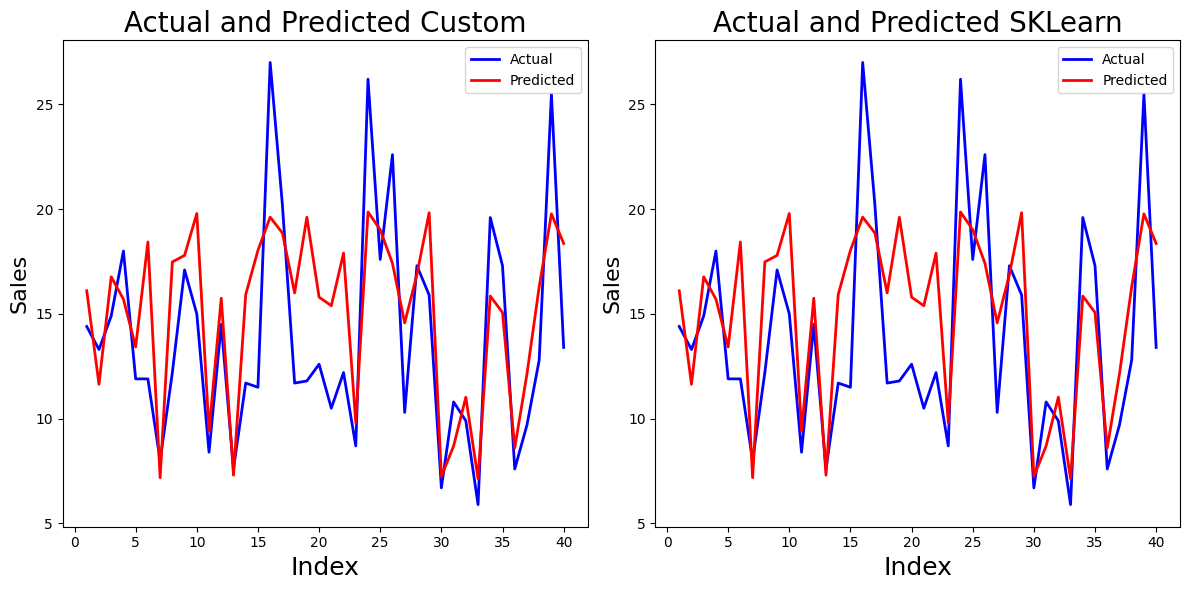

In [88]:
# Actual vs Predicted Custom
counter = [i for i in range(1, y_test.shape[0] + 1, 1)]         
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create a 1x2 grid of subplots

# Subplot 1: Custom Regression
axes[0].plot(counter, y_test, color="blue", linewidth=2, linestyle="-", label='Actual')
axes[0].plot(counter, polynomial_regression_predict(x_test, a, b, c), color="red", linewidth=2, linestyle="-", label='Predicted')
axes[0].set_title('Actual and Predicted Custom', fontsize=20)
axes[0].set_xlabel('Index', fontsize=18)
axes[0].set_ylabel('Sales', fontsize=16)

# Actual vs Predicted SKLearn
# Assuming you want another plot next to the first one
# Subplot 2: SKLearn Regression
axes[1].plot(counter, y_test, color="blue", linewidth=2, linestyle="-", label='Actual')
axes[1].plot(counter, model.predict(poly_features.transform(x_test.reshape(-1, 1))), color="red", linewidth=2, linestyle="-", label='Predicted')
axes[1].set_title('Actual and Predicted SKLearn', fontsize=20)
axes[1].set_xlabel('Index', fontsize=18)
axes[1].set_ylabel('Sales', fontsize=16)

# Add legends for both subplots
axes[0].legend()
axes[1].legend()

# Adjust the layout
plt.tight_layout()

# Show the subplots
plt.show()


In [93]:
print(f"CUSTOM\nA:{a}\nb:{b}\nc:{c}\n")
print(f"SKLEARN\nA:{model.coef_[2]}\nb:{model.coef_[1]}\nc:{model.intercept_}\n\n")

mse = mean_squared_error(y_test, model.predict(poly_features.transform(x_test.reshape(-1, 1))))
r_squared = r2_score(y_test, model.predict(poly_features.transform(x_test.reshape(-1, 1))))
print('Mean_Squared_Error SKLearn:' ,mse)
print('r_square_value SKLearn:',r_squared)

mse = mean_squared_error(y_test, polynomial_regression_predict(x_test, a, b, c))
r_squared = r2_score(y_test, polynomial_regression_predict(x_test, a, b, c))
print('\n\nMean_Squared_Error Custom:' ,mse)
print('r_square_value Custom:',r_squared)

CUSTOM
A:-9.275968434226418e-05
b:0.07536453337415137
c:5.863099985021732

SKLEARN
A:-9.275968434225873e-05
b:0.07536453337415054
c:5.863099985021707


Mean_Squared_Error SKLearn: 14.608727611729677
r_square_value SKLearn: 0.4529380883658828


Mean_Squared_Error Custom: 14.608727611729648
r_square_value Custom: 0.4529380883658839
